In [73]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

df = pd.read_csv('pima-indians-diabetes.csv');
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
Diastolic_BP,0
Skin_Fold_Thickness,0
2-Hour-Serum-Insulin,0
BMI,0
Diabetes_Function,0
Age,0
Class Variable,0


In [78]:
for column in df.columns:
  print(column, (df[column] == 0).sum())

cols = ["Glucose", "Diastolic_BP", "Skin_Fold_Thickness", "2-Hour-Serum-Insulin", "BMI"]

for column in cols:
  df[column] = df[column].replace(0, np.NaN).fillna(df[column].median())

Pregnancies 111
Glucose 5
Diastolic_BP 35
Skin_Fold_Thickness 227
2-Hour-Serum-Insulin 374
BMI 11
Diabetes_Function 0
Age 0
Class Variable 500


In [79]:
for column in df.columns:
  print(column, (df[column] == 0).sum())

Pregnancies 111
Glucose 0
Diastolic_BP 0
Skin_Fold_Thickness 0
2-Hour-Serum-Insulin 0
BMI 0
Diabetes_Function 0
Age 0
Class Variable 500


In [84]:
X = df.drop(columns=["Class Variable"])
y = df["Class Variable"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (576, 8)
X_test shape: (192, 8)
y_train shape: (576,)
y_test shape: (192,)


In [86]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [87]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.7604166666666666


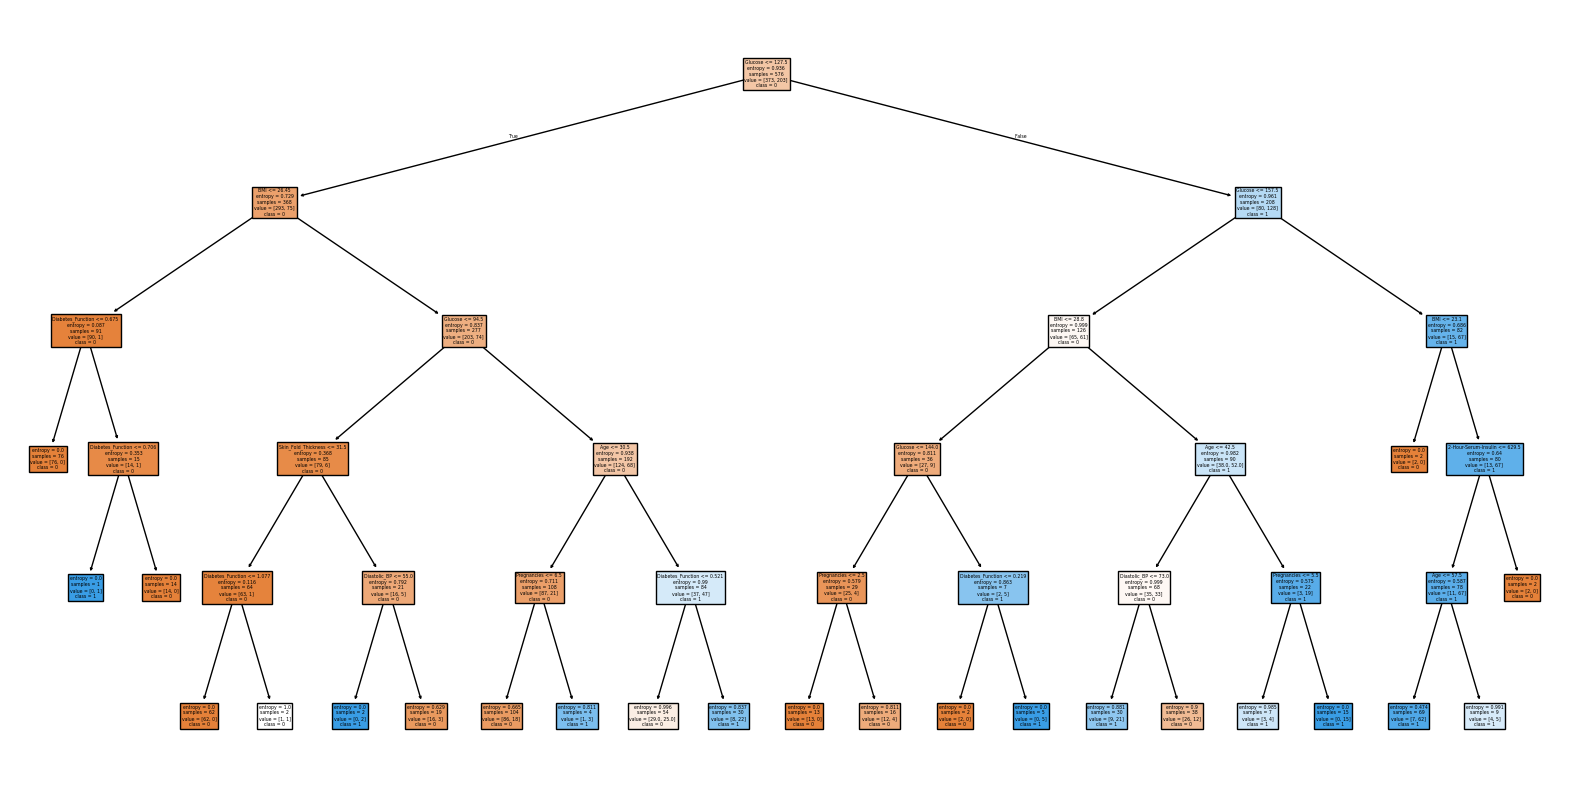

In [91]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=['0', '1'], filled=True)
plt.show()

In [95]:
print(model.feature_importances_)
print(f"Tree's Gini Impurity: {model.tree_.impurity}")
print(f"Tree Depth: {model.get_depth()}")

# Calculate and print the entropy before and after a split
print(f"Tree's entropy (before any splits): {model.tree_.impurity[0]}")  # Root entropy

[0.05528826 0.4588641  0.04763664 0.02869418 0.02159552 0.16633064
 0.09394735 0.12764331]
Tree's Gini Impurity: [0.93622004 0.72947185 0.08728059 0.         0.35335934 0.
 0.         0.83734238 0.36811501 0.11611508 0.         1.
 0.79185835 0.         0.62924922 0.93773429 0.71067685 0.66469531
 0.81127812 0.98975254 0.99603836 0.83664074 0.9612366  0.9992729
 0.81127812 0.57879462 0.         0.81127812 0.86312057 0.
 0.         0.98247409 0.99937591 0.8812909  0.89974376 0.5746357
 0.98522814 0.         0.68643817 0.         0.64025694 0.58691858
 0.47357292 0.99107606 0.        ]
Tree Depth: 5
Tree's entropy (before any splits): 0.9362200359148916
